In [42]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial'],  # Fallback to Arial if Helvetica not found
    'mathtext.fontset': 'custom',  # For consistent math rendering
    'mathtext.rm': 'Helvetica',
    'mathtext.it': 'Helvetica:italic',
    'mathtext.bf': 'Helvetica:bold',
    'font.size': 10,  # Standard size for journal publications
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
})

In [2]:
import os

# current directory
dir_nb = notebook_dir = os.getcwd()
# directory containing python scripts
dir_py = os.path.abspath(os.path.join(dir_nb, "..", "python"))
# directory to save plots
dir_pl = os.path.abspath(os.path.join(dir_nb, "..", "plots"))

os.chdir(dir_py)

In [3]:
from utils_pL import *
from utils_kint import calculate_kint

In [21]:
deut = np.linspace(0,1,6)
temp = 293
pH_read = 7

seq1 = 'AAAAAAA'
seq2 = 'PEPTIDE'

df1 = pd.DataFrame(columns=deut)
df2 = pd.DataFrame(columns=deut)

In [22]:
df1

,0.0,0.2,0.4,0.6,0.8,1.0


In [23]:
for _,x in enumerate(deut):
    acidity = get_effective_acidity(T=temp, x=x, pH_read=pH_read)
    frac_OL = get_ions_isotopic_abundance(x)['frac_OL']
    ki1 = calculate_kint(seq=seq1, T=temp, x=x, pH_read=pH_read, ref='PDLA')
    df1[x] = ki1['kforw'] + ki1['kback']
    ki2 = calculate_kint(seq=seq2, T=temp, x=x, pH_read=pH_read, ref='PDLA')
    df2[x] = ki2['kforw'] + ki2['kback']

df1 = df1.loc[(df1!=0).any(axis=1)]
df2 = df2.loc[(df2!=0).any(axis=1)]

In [24]:
df1[0]

2    466.146555
3     11.182077
4     11.182077
5     11.182077
6     11.182077
7      0.177224
Name: 0.0, dtype: float64

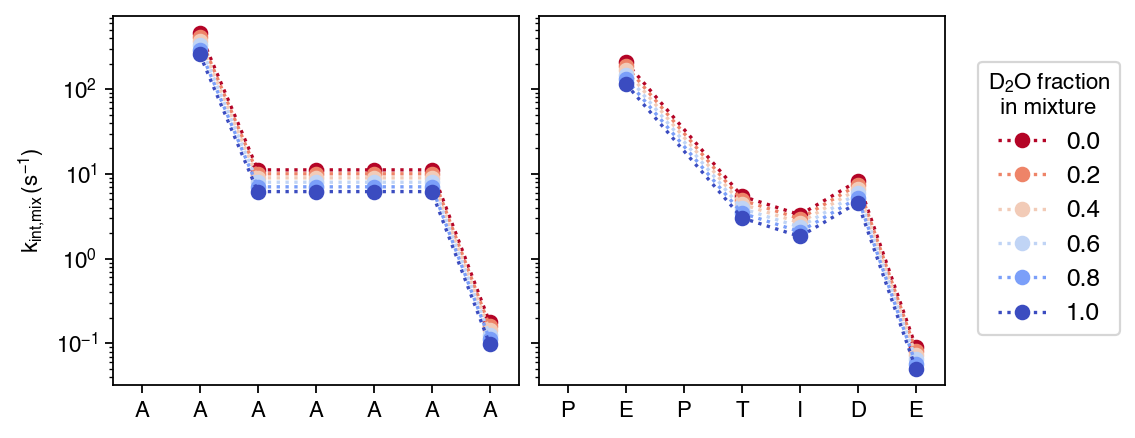

In [64]:
# Create the subplot grid with shared x-axis
fig, axes = plt.subplots(1, 2, figsize=(13,3), dpi=160, sharey='row')

norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = mpl.colormaps['coolwarm_r']

for _,x in enumerate(deut):
    axes[0].plot(df1.index, df1[x], marker='o', linestyle=':', label=np.round(x,1), color=cmap(norm(x)))
    axes[1].plot(df2.index, df2[x], marker='o', linestyle=':', label=np.round(x,1), color=cmap(norm(x)))
axes[0].set_yscale('log')
axes[0].set_ylabel(r'$k_\text{int,mix}\, (s^{-1})$')
axes[0].set_xlim(0.5,len(seq1)+0.5)
axes[0].set_xticks(np.arange(1,len(seq1)+1,1), labels=list(seq1))
axes[1].set_xlim(0.5,len(seq2)+0.5)
axes[1].set_xticks(np.arange(1,len(seq2)+1,1), labels=list(seq2))

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', title=r'$\text{D}_2\text{O}$ fraction'+'\n  in mixture', alignment='center', bbox_to_anchor=(.99, 0.5), fontsize=11)
plt.subplots_adjust(wspace=0.05, left=.5)  # Reduce space between subplots
